## 단어 가방(BOW : Bag of Words)

* 가장 간단하지만 효과적이라 널리쓰이는 방법
* 장, 문단, 문장, 서식과 같은 입력 텍스트의 구조를 제외하고 각 단어가 이 말뭉치에 얼마나 많이 나타나는지 숫자를 셈
* 구조와 상관없이 단어의 출현횟수만 세기 때문에 텍스트를 담는 가방(bag) 임
* BOW는 단어의 순서가 완전히 무시 된다는 단점이 있다. 예를 들어 의미가 완전히 반대인 두 문장이 있다고 할 때.
   
```
- `it's bad, not good at all.`
- `it's good, not bad at all.`

- "이것은 나쁜 것이 아니라 좋은 것입니다."
- "이것은 좋은 것이 아니라 나쁜 것입니다."

- "절대로 끔찍한 일이 아니야, 정말 멋진 일이야."
- "절대로 멋진 일이 아니야, 정말 끔찍한 일이야."

- "이건 실패가 아니라, 성공이야."
- "이건 성공이 아니라, 실패야."

- "그것은 문제가 아니라 해결책이다."
- "그것은 해결책이 아니라 문제다."

- "이게 슬픈 일이 아니라 기쁜 일이에요."
- "이게 기쁜 일이 아니라 슬픈 일이에요."
```

* 위 문장들의 짝은 의미가 전혀 반대지만 **완전히 동일하게 반환**됩니다.



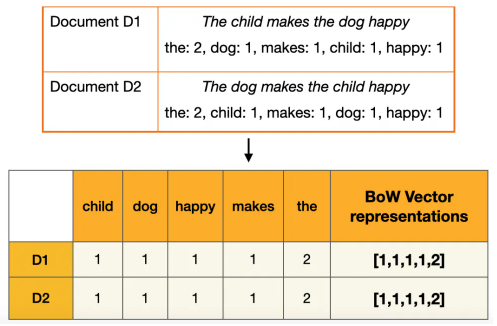





* 이를 보완하기 위해 n-gram을 사용하는 데 BOW는 하나의 토큰을 사용하지만 n-gram은 n개의 토큰을 사용할 수 있도록 합니다.

* [Bag-of-words model - Wikipedia](https://en.wikipedia.org/wiki/Bag-of-words_model)

* 머신러닝, 딥러닝 등에서 사용됨

## 단어 벡터화 하기

* https://scikit-learn.org/stable/modules/feature_extraction.html

## 라이브러리 로드

In [ ]:
# !pip install scikit-learn

   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
    --------------------------------------- 0.3/10.7 MB ? eta -:--:--
    --------------------------------------- 0.3/10.7 MB ? eta -:--:--
    --------------------------------------- 0.3/10.7 MB ? eta -:--:--
    --------------------------------------- 0.3/10.7 MB ? eta -:--:--
   - -------------------------------------- 0.5/10.7 MB 285.8 kB/s eta 0:00:36
   - ------

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#### CountVectorizer()
- 사이킷런에서 제공하는 CountVectorizer 는 bag of words 를 만들 수 있다.
- 텍스트 문서 모음을 토큰 수의 행렬로 변환
- 단어들의 카운트(출현 빈도)로 여러 문서들을 벡터화
- 문서목록에서 각 문서의 feature(문장의 특징) 노출수를 가중치로 설정한 BOW 벡터를 생성
- 카운트 행렬, 단어 문서 행렬 (Term-Document Matrix, TDM))
- max_df, min_df 인수를 사용하여 문서에서 토큰이 나타난 횟수를 기준으로 단어장을 구성할 수도 있음
- 토큰의 빈도가 max_df로 지정한 값을 초과 하거나 min_df로 지정한 값보다 작은 경우에는 무시하며 인자 값은 정수인 경우 횟수, 부동소수점인 경우 비율을 의미
- API documentation:https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html


#### 1. 사용법
- 1) 분석하고자 하는 데이터를 corpus 에 담기
- 2) sklearn.feature_extraction.text 에서 CountVectorizer() 불러오기
- 3) fit()에 데이터(corpus)를 넣어 단어 사전 학습
- 4) transform() 메서드를 통해 수치 행렬 형태로 변환


#### 2. 생성
  - CountVectorizer() 이용
  - 주요 매개 변수
    - analyzer : 단어, 문자 단위의 벡터화 방법 정의
    - ngram_range : BOW 단위 수가 (1, 3) 이라면 1 ~ 3 개 까지 토큰을 묶어서 벡터화
    - max_df : 주어진 임계값보다 빈도가 높은 단어(불용어) 제외
      - max_df=0.90 : 문서의 90%까지 사용. 그보다 큰 단어는 제외
    - min_df : 컷오프, 주어진 임곗값보다 빈도가 낮은 단어를 제외
      - min_df=0.01 : 문서의 1% 이상 등장하는 단어를 사용. 그보다 적은 단어는 제외
    - stop_words : 불용어 정의
    

### 공식 예제 실행

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus) # 문서로 만들어줘
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 21 stored elements and shape (4, 9)>

In [ ]:
vectorizer.get_feature_names_out()
print(X.toarray())
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X2 = vectorizer2.fit_transform(corpus)
vectorizer2.get_feature_names_out()

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


array(['and this', 'document is', 'first document', 'is the', 'is this',
       'second document', 'the first', 'the second', 'the third',
       'third one', 'this document', 'this is', 'this the'], dtype=object)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 21 stored elements and shape (4, 9)>

In [7]:
print(X.toarray())
print(vectorizer.get_feature_names_out())
pd.DataFrame(X.toarray(), columns=[vectorizer.get_feature_names_out()], index=["D1", "D2", "D3", "D4"])

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]
['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


,and,document,first,is,one,second,the,third,this
D1,0,1,1,1,0,0,1,0,1
D2,0,2,0,1,0,1,1,0,1
D3,1,0,0,1,1,0,1,1,1
D4,0,1,1,1,0,0,1,0,1


In [ ]:
# ngram_range=(2, 2) : 2개씩 묶기
# ngram_range=(1, 3) : 1~3개씩 묶기

# fit() : 문서에 있는 모든 토큰의 단어 사전을 학습
# transform() : 문서를 단어와 문서 행렬로 변환

vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X2 = vectorizer2.fit_transform(corpus)
print(X2.toarray())
print(vectorizer2.get_feature_names_out())
pd.DataFrame(X.toarray(), columns=[vectorizer.get_feature_names_out()], index=["D1", "D2", "D3", "D4"])

[[0 0 1 1 0 0 1 0 0 0 0 1 0]
 [0 1 0 1 0 1 0 1 0 0 1 0 0]
 [1 0 0 1 0 0 0 0 1 1 0 1 0]
 [0 0 1 0 1 0 1 0 0 0 0 0 1]]
['and this' 'document is' 'first document' 'is the' 'is this'
 'second document' 'the first' 'the second' 'the third' 'third one'
 'this document' 'this is' 'this the']


,and,document,first,is,one,second,the,third,this
D1,0,1,1,1,0,0,1,0,1
D2,0,2,0,1,0,1,1,0,1
D3,1,0,0,1,1,0,1,1,1
D4,0,1,1,1,0,0,1,0,1


### 한글 예제

In [9]:
# corpus(코퍼스) : 말뭉치 - 자연어 연구를 위해 특정한 목적을 가지고 언어의 표본을 추출

corpus = ["코로나 거리두기와 코로나 상생지원금 문의입니다.",
          "지하철 운행시간과 지하철 요금 문의입니다.",
          "지하철 승강장 문의입니다.",
          "코로나 선별진료소 문의입니다.",
          "버스 운행시간 문의입니다.",
          "버스 터미널 위치 안내입니다.",
          "코로나 거리두기 안내입니다.",
          "택시 승강장 문의입니다."]

corpus

['코로나 거리두기와 코로나 상생지원금 문의입니다.',
 '지하철 운행시간과 지하철 요금 문의입니다.',
 '지하철 승강장 문의입니다.',
 '코로나 선별진료소 문의입니다.',
 '버스 운행시간 문의입니다.',
 '버스 터미널 위치 안내입니다.',
 '코로나 거리두기 안내입니다.',
 '택시 승강장 문의입니다.']

In [10]:
vect = CountVectorizer()
X = vect.fit_transform(corpus)
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 27 stored elements and shape (8, 16)>

In [11]:
pd.DataFrame(
    X.toarray(),
    columns=[vect.get_feature_names_out()],
    index=["D1", "D2", "D3", "D4", "D5", "D6", "D7", "D8"],
)

,거리두기,거리두기와,문의입니다,버스,상생지원금,선별진료소,승강장,안내입니다,요금,운행시간,운행시간과,위치,지하철,코로나,택시,터미널
D1,0,1,1,0,1,0,0,0,0,0,0,0,0,2,0,0
D2,0,0,1,0,0,0,0,0,1,0,1,0,2,0,0,0
D3,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
D4,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
D5,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0
D6,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
D7,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
D8,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


### fit, transform, fit_transfrom의 차이점
* fit(): 원시 문서에 있는 모든 토큰의 어휘 사전 학습.
* transform(): 문서를 문서 용어 매트릭스로 변환. transform 이후엔 매트릭스로 변환되어 숫자형태로 변경됨
* fit_transform(): 어휘 사전을 배우고 문서 용어 매트릭스를 반환. fit 다음에 변환이 오는 것과 동일하지만 더 효율적으로 구현된다.

⚠️ 주의! ⚠️
* 단, **fit_transform 은 학습데이터에만 사용**하고 예측 데이터에는 transform 을 사용.
* 예측 데이터에도 fit_transform 을 사용하게 된다면 서로 다른 단어사전으로 행렬을 만들게 된다.
* fit 과 transform 을 따로 사용해 준다 하더라도 fit 은 학습 데이터에만 사용. 같은 단어 사전으로 예측 데이터셋의 단어 사전을 만들기 위해서

예측과 학습
* 예측 : transform() -> 예측데이터
* 학습 : fit() - 학습데이터

In [13]:
cvect = CountVectorizer()
cvect.fit(corpus)

,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None
,stop_words,None
,token_pattern,'(?u)\\b\\w\\w+\\b'
,ngram_range,"(1, ...)"
,analyzer,'word'


In [14]:
dtm = cvect.transform(corpus)
dtm

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 27 stored elements and shape (8, 16)>

In [ ]:
# 단어사전 확인 -> 가나다 순으로 나열
vect.vocabulary_

{'코로나': 13,
 '거리두기와': 1,
 '상생지원금': 4,
 '문의입니다': 2,
 '지하철': 12,
 '운행시간과': 10,
 '요금': 8,
 '승강장': 6,
 '선별진료소': 5,
 '버스': 3,
 '운행시간': 9,
 '터미널': 15,
 '위치': 11,
 '안내입니다': 7,
 '거리두기': 0,
 '택시': 14}

#### CountVectorizer(ngram_range=(최소, 최대))
- #### n-gram : 앞, 뒤 단어 묶어서 사용


[예시] 어절 단위의 토큰

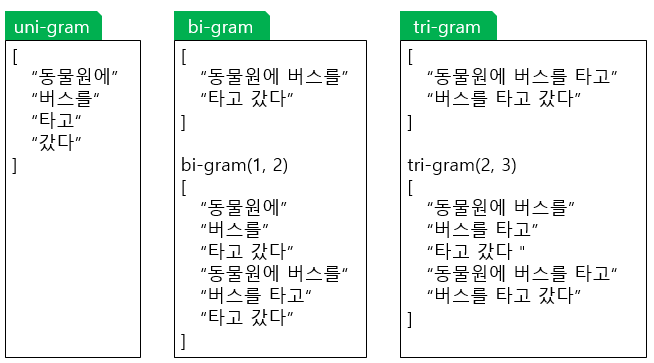

In [16]:
vect = CountVectorizer(ngram_range=(1, 2))
X = vect.fit_transform(corpus)
dtm = X.toarray()
dtm

array([[0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
        0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]])

In [18]:
# 단어 사전 확인
pd.options.display.max_columns = None
pd.DataFrame(dtm, columns=vect.get_feature_names_out())

,거리두기,거리두기 안내입니다,거리두기와,거리두기와 코로나,문의입니다,버스,버스 운행시간,버스 터미널,상생지원금,상생지원금 문의입니다,선별진료소,선별진료소 문의입니다,승강장,승강장 문의입니다,안내입니다,요금,요금 문의입니다,운행시간,운행시간 문의입니다,운행시간과,운행시간과 지하철,위치,위치 안내입니다,지하철,지하철 승강장,지하철 요금,지하철 운행시간과,코로나,코로나 거리두기,코로나 거리두기와,코로나 상생지원금,코로나 선별진료소,택시,택시 승강장,터미널,터미널 위치
0,0,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1
6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [20]:
def display_transform_dtm(vect, corpus):
    X = vect.fit_transform(corpus)
    dtm = X.toarray()
    return pd.DataFrame(dtm, columns=vect.get_feature_names_out())

In [21]:
cvect = CountVectorizer(ngram_range=(2, 3))
display_transform_dtm(cvect, corpus)

,거리두기 안내입니다,거리두기와 코로나,거리두기와 코로나 상생지원금,버스 운행시간,버스 운행시간 문의입니다,버스 터미널,버스 터미널 위치,상생지원금 문의입니다,선별진료소 문의입니다,승강장 문의입니다,요금 문의입니다,운행시간 문의입니다,운행시간과 지하철,운행시간과 지하철 요금,위치 안내입니다,지하철 승강장,지하철 승강장 문의입니다,지하철 요금,지하철 요금 문의입니다,지하철 운행시간과,지하철 운행시간과 지하철,코로나 거리두기,코로나 거리두기 안내입니다,코로나 거리두기와,코로나 거리두기와 코로나,코로나 상생지원금,코로나 상생지원금 문의입니다,코로나 선별진료소,코로나 선별진료소 문의입니다,택시 승강장,택시 승강장 문의입니다,터미널 위치,터미널 위치 안내입니다
0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
4,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


#### CountVectorizer(ngram_range=(최소, 최대), min_df=최소빈도수, max_df=최대빈도수)
> min_df와 max_df : 빈도수 설정
- 토큰이 나타난 횟수를 기준으로 단어수 구성
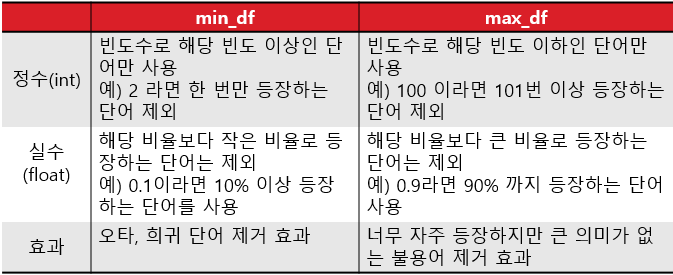

In [23]:
# 단어를 1~3 개까지 묶어서 사용 # 20% 이상 등장하는 단어만 사용 # 5번까지 등장하는 단어로만 사전 구성

# 5번 등장
# cvect = CountVectorizer(ngram_range=(1, 3), min_df=0.2, max_df=5)

# 80% 까지 등장
cvect = CountVectorizer(ngram_range=(1, 3), min_df=0.2, max_df=0.8)
display_transform_dtm(cvect, corpus)

,문의입니다,버스,승강장,승강장 문의입니다,안내입니다,지하철,코로나
0,1,0,0,0,0,0,2
1,1,0,0,0,0,2,0
2,1,0,1,1,0,1,0
3,1,0,0,0,0,0,1
4,1,1,0,0,0,0,0
5,0,1,0,0,1,0,0
6,0,0,0,0,1,0,1
7,1,0,1,1,0,0,0


#### CountVectorizer(ngram_range=(최소, 최대), min_df=최소빈도수, max_df=최대빈도수, max_features=학습 단어 개수 제한)


In [ ]:
# max_features : 개수만큼의 단어만 추출
# 제일 빈도수가 높은 max_features=n 중에서 n개만 학습하겠다는 의미

cvect = CountVectorizer(ngram_range=(1, 7), min_df=0.2, max_df=0.8, max_features=10)
display_transform_dtm(cvect, corpus)

,문의입니다,버스,승강장,승강장 문의입니다,안내입니다,지하철,코로나
0,1,0,0,0,0,0,2
1,1,0,0,0,0,2,0
2,1,0,1,1,0,1,0
3,1,0,0,0,0,0,1
4,1,1,0,0,0,0,0
5,0,1,0,0,1,0,0
6,0,0,0,0,1,0,1
7,1,0,1,1,0,0,0


### 불용어 stop_words


In [27]:
# stop_sords:문장에 자주 등장하지만 문장 안에서 큰 의미를 갖지 않는 단어
# 대표적으로 접속사, 대명사, 조사 등...

stop_words = ['코로나', '문의입니다']
cvect = CountVectorizer(ngram_range=(1, 7), min_df=1, max_df=0.9, max_features=10, stop_words=stop_words)
display_transform_dtm(cvect, corpus)

,거리두기,거리두기와,거리두기와 상생지원금,버스,버스 운행시간,버스 터미널,버스 터미널 위치,승강장,안내입니다,지하철
0,0,1,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,1,0,1
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,1,0,0,0,0,0
5,0,0,0,1,0,1,1,0,1,0
6,1,0,0,0,0,0,0,0,1,0
7,0,0,0,0,0,0,0,1,0,0


##### analyzer : 단어 가방 모형을 만드는 기준


In [ ]:
# analyzer = 'word' -> 기본값
cvect = CountVectorizer(analyzer='word', ngram_range=(1, 5), min_df=1, max_features=30)
display_transform_dtm(cvect, corpus)

,거리두기,거리두기 안내입니다,거리두기와,거리두기와 코로나,거리두기와 코로나 상생지원금 문의입니다,문의입니다,버스,버스 운행시간,버스 운행시간 문의입니다,버스 터미널,버스 터미널 위치,버스 터미널 위치 안내입니다,상생지원금,상생지원금 문의입니다,선별진료소,선별진료소 문의입니다,승강장,승강장 문의입니다,안내입니다,요금,요금 문의입니다,운행시간,운행시간 문의입니다,운행시간과,운행시간과 지하철,운행시간과 지하철 요금,운행시간과 지하철 요금 문의입니다,위치,지하철,코로나
0,0,0,1,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,1,0,2,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0


### TF-IDF

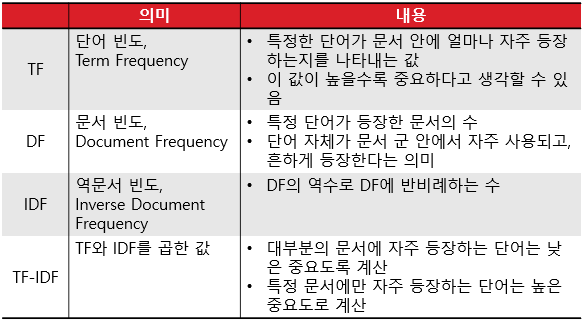


> 사이킷 런 TfidfVectorizer
- CountVectorizer() + TfidTransformer()
- TfidVectorizer 매개변수
  - norm = 'l2'
    - L2
      - 벡터의 각 원소의 제곱의 합이 1이 되도록 만드는 것이 기본값
      - 문서 간 코사인 유사도 계산에 유용
      - 높은 빈도를 가진 문서에 대한 가중치 감소
    - L1
      - 벡터의 각 원소의 절대값의 합이 1이 되도록 크기를 조절
      - 문서 내 각 단어의 상대적 중요도 표현
      - 불균형 문서 길이 영향 감소    
  - smooth_idf = False
    - True 일 때는 피처를 만들 때 0으로 나오는 항목에 대해 작은 값을 더해서 피처를 만들고 False 일때는 더하지 않음
  - sublinear_tf = False
    - True 일 때는 로그 스케일링 / False 일 때는 단어 빈도를 그대로 사용
    - 이상치가 데이터를 심하게 왜곡하는 경우 sublinear_tf=True 로 두어 완화가 되는 효과를 얻을 수 있음
  - use_idf = True
    - TF-IDF를 이용해 피처를 만들 것인지 단어 빈도 자체를 사용할 것인지 결정

In [31]:
# 가중치 사용시 CountVectorizer() 사용 X
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
eng_corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(eng_corpus)
display_transform_dtm(vectorizer, eng_corpus)

,and,document,first,is,one,second,the,third,this
0,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085
1,0.000000,0.687624,0.000000,0.281089,0.000000,0.538648,0.281089,0.000000,0.281089
2,0.511849,0.000000,0.000000,0.267104,0.511849,0.000000,0.267104,0.511849,0.267104
3,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085


In [35]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
display_transform_dtm(vectorizer, corpus)

,거리두기,거리두기와,문의입니다,버스,상생지원금,선별진료소,승강장,안내입니다,요금,운행시간,운행시간과,위치,지하철,코로나,택시,터미널
0,0.000000,0.479919,0.239821,0.000000,0.479919,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.694148,0.000000,0.000000
1,0.000000,0.000000,0.222166,0.000000,0.000000,0.00000,0.000000,0.000000,0.444589,0.000000,0.444589,0.000000,0.745200,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.388500,0.000000,0.000000,0.00000,0.651563,0.000000,0.000000,0.000000,0.000000,0.000000,0.651563,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.375318,0.000000,0.000000,0.75107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.543168,0.000000,0.000000
4,0.000000,0.000000,0.357659,0.599839,0.000000,0.00000,0.000000,0.000000,0.000000,0.715732,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.454195,0.000000,0.00000,0.000000,0.454195,0.000000,0.000000,0.000000,0.541948,0.000000,0.000000,0.000000,0.541948
6,0.670344,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.561801,0.000000,0.000000,0.000000,0.000000,0.000000,0.484788,0.000000,0.000000
7,0.000000,0.000000,0.357659,0.000000,0.000000,0.00000,0.599839,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.715732,0.000000


In [36]:
vectorizer = TfidfVectorizer(ngram_range=(3,4), min_df=1, max_df=1.0)
X = vectorizer.fit_transform(corpus)
display_transform_dtm(vectorizer, corpus)

,거리두기와 코로나 상생지원금,거리두기와 코로나 상생지원금 문의입니다,버스 운행시간 문의입니다,버스 터미널 위치,버스 터미널 위치 안내입니다,운행시간과 지하철 요금,운행시간과 지하철 요금 문의입니다,지하철 승강장 문의입니다,지하철 요금 문의입니다,지하철 운행시간과 지하철,지하철 운행시간과 지하철 요금,코로나 거리두기 안내입니다,코로나 거리두기와 코로나,코로나 거리두기와 코로나 상생지원금,코로나 상생지원금 문의입니다,코로나 선별진료소 문의입니다,택시 승강장 문의입니다,터미널 위치 안내입니다
0,0.447214,0.447214,0.0,0.00000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.447214,0.447214,0.447214,0.0,0.0,0.00000
1,0.000000,0.000000,0.0,0.00000,0.00000,0.447214,0.447214,0.0,0.447214,0.447214,0.447214,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000
2,0.000000,0.000000,0.0,0.00000,0.00000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000
3,0.000000,0.000000,0.0,0.00000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.00000
4,0.000000,0.000000,1.0,0.00000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000
5,0.000000,0.000000,0.0,0.57735,0.57735,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.57735
6,0.000000,0.000000,0.0,0.00000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000
7,0.000000,0.000000,0.0,0.00000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.0,0.00000


In [ ]:
# 희소 행렬 확인


### IDF 자세히 보기